In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, dirname, getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
import nilearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

Google Drive is detected!


## 1. ROI list

   - Localizer

In [3]:
## ROI
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = nilearn.image.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7f9258d47190>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7f925a53c290>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f925a53c490>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7f925a53c6d0>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f925a53c890>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f925a53cad0>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7f925a53cd10>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f925a53cf10>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7f925a5571d0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f925a557310>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7f925a557550>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f925a557750>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f925a557890>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f925a557b50>,
 'n200_c7_L_Thalamus': <nibabel

In [4]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f925a53c490>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f925a53c890>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f925a53cf10>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f925a557310>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f925a557750>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f925a557890>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7f925a557d10>}

   - DMN

   - Visual Area

## 2. Visualization ROIs

0

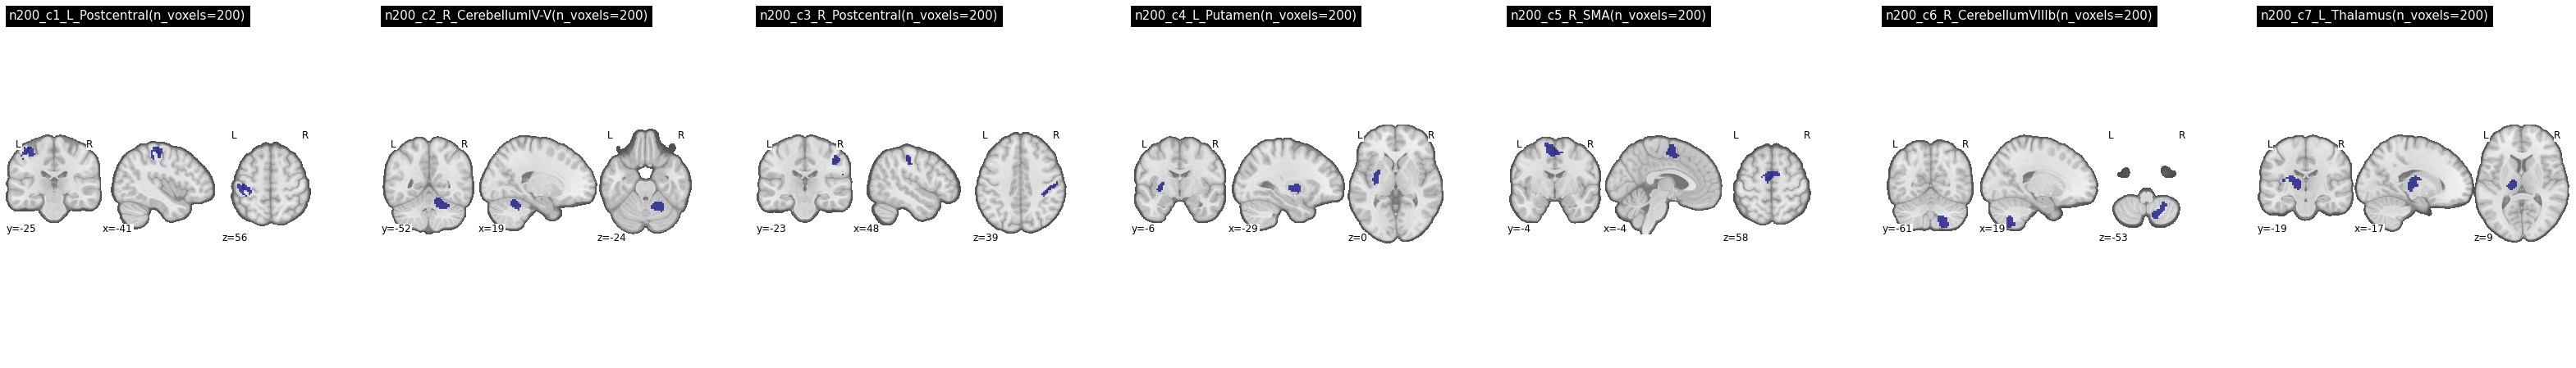

In [5]:
GA.draw_rois()

## *3. Calculation (run once)

In [5]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage), GA.lda)

In [6]:
## save the result as a pickle file
GA.save_as_pkl(path=GA.dir_script, data=GA.scores, suffix='7localizers')

## 4. Loading a previous result

In [5]:
GA.show_pkl_list(path=GA.dir_script, word='7localizers')

,name,identity
0,./20210714_7localizers.pkl,a
1,./20210511_7localizers.pkl,a


In [6]:
decacc = GA.load_from_pkl(fname='./20210714_7localizers.pkl')

In [7]:
GA.make_df_score(fname='./20210714_7localizers.pkl')

,subj,stage,ROI,mean_accuracy
0,01,early_practice,n200_c1_L_Postcentral,0.378472
1,01,early_practice,n200_c2_R_CerebellumIV-V,0.260417
2,01,early_practice,n200_c3_R_Postcentral,0.312500
3,01,early_practice,n200_c4_L_Putamen,0.260417
4,01,early_practice,n200_c5_R_SMA,0.336806
...,...,...,...,...
835,44,late_unpractice,n200_c3_R_Postcentral,0.288194
836,44,late_unpractice,n200_c4_L_Putamen,0.319444
837,44,late_unpractice,n200_c5_R_SMA,0.250000
838,44,late_unpractice,n200_c6_R_CerebellumVIIIb,0.277778


In [ ]:
draw_lineplot_with_roi()3